# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 2: Data Inspection, Cleaning and Wrangling in Python

Mark Bauer

Table of Contents
=================

   Getting Started
          
   1. Importing Libraries 
   2. Reading in Data as a pandas Dataframe      
   3. Data Inspection
       * 3.1 Previewing Data
       * 3.2 Calculating Summary Statistics
       * 3.3 Identifying Null Values 
   4. Data Cleaning & Wrangling
       * 4.1 Previewing Column Values
       * 4.2 Exploring Distribution of Values
       * 4.3 Making a Box Plot
       * 4.4 Calculating Interquartile Range (IQR)
       * 4.5 Dropping Null Values
       * 4.6 Replacing Null Values   
   5. Analysis
       * 5.1. Timeseries of Year Built
       * 5.2. Attempting to Identify the Oldest Building in NYC   
   6. Conclusion

**Goal:** In this notebook, we will review various ways to to inspect, clean, wrangle, and detect outliers in your data.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Getting Started: Accessing the Building Footprints Dataset
## Reading in data as CSV in static form

Screenshot of link address.
![building_footprints_csv](images/building-footprints-csv.png)

### Dataset Web Page Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

### Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

### Attribute Information:
---------------------------------------------
| Attribute | Description | Field Type | Sensitive Field (Y/N) | Notes| 
|------------ | ------------- | -------- | ----------- | ----------|
| BASE_BBL | Borough, block, and lot number for the tax lot that the footprint is physically located within. | text | No
| MPLUTO_BBL | Borough, block, and lot number to be used for joining the building footprints data to DCP's MapPLUTO data, which aggregates data for condominium buildings using DOF's billing BBL. For non-condominium buildings the billing BBL is the same as the BASE_BBL. For condominium buildings the billing BBL may be the same for multiple buildings on different physical tax lots if they are part of the same billing unit for DOF purposes. | text | No
| BIN | Building Identification Number. A number assigned by City Planning and used by Dept. of Buildings to reference information pertaining to an individual building. The first digit is a borough code (1 = Manhattan, 2 = The Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island). The remaining 6 digits are unique for buildings within that borough. In some cases where these 6 digits are all zeros (e.g. 1000000, 2000000, etc.) the BIN is unassigned or unknown. | double | No
| NAME | Building name (limited to commonly known names). This field has not been actively maintained since the original creation of this dataset. | text | No
| LSTMODDATE | Feature last modified date | date | No
| LSTSTATTYPE | Feature last status type (Demolition, Alteration, Geometry, Initialization, Correction, Marked for Construction, Marked For Demolition, Constructed) | text | No
| CNSTRCT_YR | The year construction of the building was completed. <br>Originally this column was populated using the Department of Finance Real Property Assessment Database (RPAD). Beginning in 2017 this will be the first year the completed structure is visible in available orthoimagery. Records where this is zero or NULL mean that this information was not available. | double | No
| DOITT_ID | Unique identifier assigned by DOITT.  | double | No
| HEIGHTROOF | Building Height is calculated as the difference from the building elevation from the Elevation point feature class and the elevation in the interpolated TIN model. This is the height of the roof above the ground elevation, NOT its height above sea level. Records where this is zero or NULL mean that this information was not available. | double | No | The units of measurement are based on the coordinate reference system used, which for all Planimetrics is New York State Plane Coordinates, Long Island East Zone, NAD83, US foot. All measurements in the attribute tables are in US foot. The building height information is updated through our planimetric updates every 4 years. In between those 4-year update cycles, DoITT manually updates building height information from a variety of sources -- (1) Final as-built heights as shown in plan drawings posted on Department of Buildings BIS website (2) EagleView Oblique imagery, direct measurements taken on photogrammetrically controlled aerial imagery (3) Cyclomedia imagery, direct measurements were taken on photogrammetrically controlled terrestrial imagery (for buildings less than 60’ tall, only)
| FEAT_CODE | Type of Building. List of values:<br>2100 = Building<br>5100 = Building Under Construction<br>5110 = Garage<br>2110 = Skybridge<br>1001 = Gas Station Canopy<br>1002 = Storage Tank<br>1003 = Placeholder (triangle for permitted bldg)<br>1004 = Auxiliary Structure (non-addressable, not garage)<br>1005 = Temporary Structure (e.g. construction trailer) | long | No
| GROUNDELEV | Lowest Elevation at the building ground level. Calculated from LiDAR or photogrammetrically. | double | No | The units of measurement are based on the coordinate reference system used, which for all Planimetrics is New York State Plane Coordinates, Long Island East Zone, NAD83, US foot. All measurements in the attribute tables are in US foot.
| GEOM_SOURCE | Indicates the reference source used to add or update the feature. Photogrammetric means the feature was added or updated using photogrammetric stereo-compilation methodology. This is the most accurate update method and should conform to the ASPRS accuracy standards. Other (Manual) means the feature was added or updated by heads-up digitizing from orthophotos or approximated from a plan drawing. These features will be generally be less accurate and may not conform to the ASPRS accuracy standards. | text | No

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# to plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
# printing verions of Python modules and packages with **watermark** 
# documention for installing watermark: https://github.com/rasbt/watermark

%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.22.4
pandas    : 1.4.2
matplotlib: 3.5.2
seaborn   : 0.11.2



# 2. Reading in Data as a pandas Dataframe
If you receive `HTTPError: HTTP Error 404: Not Found`, you need to replace the CSV link. The path might have been updated.

In [3]:
# reading in our data as a pandas dataframe called building_df
path = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'
building_df = pd.read_csv(path)

# preview the data
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm


# 3. Data Inspection
## 3.1 Previewing Data

In [4]:
# previewing the first five rows
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm


In [5]:
# previewing the last five rows
building_df.tail()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1084388,MULTIPOLYGON (((-74.01049207665406 40.71574221...,NaN,1090140,2022.0,05/05/2023 12:00:00 AM,Initialization,1299604,175.0,5100.0,17.0,0,0,1001370010,1001370010,Other (Man
1084389,MULTIPOLYGON (((-74.09798009961735 40.57859613...,NaN,5170229,2023.0,05/05/2023 12:00:00 AM,Constructed,1299605,24.0,2100.0,5.0,0,0,5036790010,5036790010,Photogramm
1084390,MULTIPOLYGON (((-74.09786575532969 40.57853374...,NaN,5170231,2023.0,05/05/2023 12:00:00 AM,Constructed,1299606,24.0,2100.0,5.0,0,0,5036790107,5036790107,Photogramm
1084391,MULTIPOLYGON (((-74.09788774086378 40.57869974...,NaN,5053312,2023.0,05/05/2023 12:00:00 AM,Constructed,1299607,24.0,2100.0,5.0,0,0,5036790011,5036790011,Photogramm
1084392,MULTIPOLYGON (((-74.09777339648508 40.57863734...,NaN,5170230,2023.0,05/05/2023 12:00:00 AM,Constructed,1299608,24.0,2100.0,5.0,0,0,5036790008,5036790008,Photogramm


In [6]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_df.shape

(1084393, 15)

In [7]:
# more readable
rows, columns = building_df.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,084,393 rows and 15 columns.


In [8]:
# the object's type
type(building_df)

pandas.core.frame.DataFrame

In [9]:
# printing the object's type of a column
type(building_df['CNSTRCT_YR'])

pandas.core.series.Series

In [10]:
# notice the difference of type from series to dataframe
print(type(building_df["CNSTRCT_YR"]))
print(type(building_df[["CNSTRCT_YR"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
# printing the columns
building_df.columns

Index(['the_geom', 'NAME', 'BIN', 'CNSTRCT_YR', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE'],
      dtype='object')

In [12]:
# printing the data types of our columns
building_df.dtypes

the_geom       object
NAME           object
BIN             int64
CNSTRCT_YR    float64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA      int64
SHAPE_LEN       int64
BASE_BBL        int64
MPLUTO_BBL      int64
GEOMSOURCE     object
dtype: object

In [13]:
# printing the names, non-null counts and datatypes of columns
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084393 entries, 0 to 1084392
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1084393 non-null  object 
 1   NAME        1932 non-null     object 
 2   BIN         1084393 non-null  int64  
 3   CNSTRCT_YR  1073625 non-null  float64
 4   LSTMODDATE  1084393 non-null  object 
 5   LSTSTATYPE  1084111 non-null  object 
 6   DOITT_ID    1084393 non-null  int64  
 7   HEIGHTROOF  1081704 non-null  float64
 8   FEAT_CODE   1084388 non-null  float64
 9   GROUNDELEV  1083850 non-null  float64
 10  SHAPE_AREA  1084393 non-null  int64  
 11  SHAPE_LEN   1084393 non-null  int64  
 12  BASE_BBL    1084393 non-null  int64  
 13  MPLUTO_BBL  1084393 non-null  int64  
 14  GEOMSOURCE  1084132 non-null  object 
dtypes: float64(4), int64(6), object(5)
memory usage: 124.1+ MB


In [14]:
# printing index type
building_df.index

RangeIndex(start=0, stop=1084393, step=1)

In [15]:
# printing True/False if column is unique on our unique key (DOITT_ID)
building_df['DOITT_ID'].is_unique

True

## 3.2 Calculating Summary Statistics

In [16]:
# printing descriptive statistics of our numeric columns
building_df.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.084393e+06,1.073625e+06,1.084393e+06,1.081704e+06,1.084388e+06,1.083850e+06,1084393.0,1084393.0,1.084393e+06,1.084393e+06
mean,3.712208e+06,1.939445e+03,5.939564e+05,2.764630e+01,2.696868e+03,5.510704e+01,0.0,0.0,3.563536e+09,3.563523e+09
std,1.026690e+06,2.926845e+01,3.614542e+05,2.164535e+01,1.201108e+03,4.152069e+01,0.0,0.0,9.859102e+08,9.859443e+08
min,1.000002e+06,1.652000e+03,1.000000e+00,0.000000e+00,0.000000e+00,-1.600000e+01,0.0,0.0,2.025280e+08,3.035390e+05
25%,3.129416e+06,1.920000e+03,2.877660e+05,1.844195e+01,2.100000e+03,2.500000e+01,0.0,0.0,3.043300e+09,3.043300e+09
50%,4.067590e+06,1.930000e+03,5.756970e+05,2.611000e+01,2.100000e+03,4.600000e+01,0.0,0.0,4.019490e+09,4.019490e+09
75%,4.483073e+06,1.955000e+03,8.654080e+05,3.111000e+01,2.100000e+03,7.400000e+01,0.0,0.0,4.106950e+09,4.106950e+09
max,5.799523e+06,2.023000e+03,1.299608e+06,1.550000e+03,5.110000e+03,5.560000e+02,0.0,0.0,6.000000e+09,6.000000e+09


In [17]:
# printing descriptive statistics of our non-numeric columns
building_df.describe(include=['O'])

,the_geom,NAME,LSTMODDATE,LSTSTATYPE,GEOMSOURCE
count,1084393,1932,1084393,1084111,1084132
unique,1084393,1564,1561,12,3
top,MULTIPOLYGON (((-73.96664570466969 40.62599676...,Adler Place Town Houses,08/22/2017 12:00:00 AM,Constructed,Photogramm
freq,1,52,802780,1081756,1014891


In [18]:
# returning the mode of CNSTRCT_YR
(building_df
 .loc[:, ['CNSTRCT_YR']]
 .mode()
 .rename(index={0: "mode"})
)

,CNSTRCT_YR
mode,1920.0


In [19]:
# value counts of the CNSTRCT_YR column - top 10
(building_df['CNSTRCT_YR']
 .value_counts()
 .head(10)
)

1920.0    130536
1930.0    112809
1925.0    109259
1950.0     62765
1910.0     52432
1940.0     51306
1960.0     40825
1935.0     38607
1931.0     36901
1945.0     34075
Name: CNSTRCT_YR, dtype: int64

In [20]:
# value counts of the NAME column - top 20
(building_df['NAME']
 .value_counts()
 .head(20)
)

Adler Place Town Houses                  52
Cooper Place Town Houses                 38
Broun Place Town Houses                  36
Debs Place Town Houses                   34
Defoe Place Town Houses                  26
Asch Loop Town Houses                    18
Earhart Lane Town Houses                 16
Comfort station                          12
NO NAME                                  10
Restrooms                                 8
Kimball Block                             6
10                                        5
Educational Park                          5
20                                        5
21                                        4
Terminal 5                                4
27                                        4
Thomas Greene Playground-Building         4
Lawrence C Thompson Mem Park-Building     4
22                                        4
Name: NAME, dtype: int64

In [21]:
# group by 'LSTSTATYPE', count of rows
(building_df
 .groupby(by='LSTSTATYPE')['DOITT_ID']
 .count()
)

LSTSTATYPE
Alteration                     1143
Constructed                 1081756
Correction                       27
Demolition                        8
Geometry                         17
Initialization                  311
Investigate Construction         36
Investigate Demolition            2
Marked for Construction         374
Marked for Demolition            80
Merged                           76
Split                           281
Name: DOITT_ID, dtype: int64

In [22]:
# group by 'FEAT_CODE', mean value of 'HEIGHTROOF' and 'GROUNDELEV'
(building_df
 .groupby(by='FEAT_CODE')[['HEIGHTROOF', 'GROUNDELEV']]
 .mean()
 .rename(columns={'HEIGHTROOF':'HEIGHTROOF_avg', 'GROUNDELEV':'GROUNDELEV_avg'})
)

,HEIGHTROOF_avg,GROUNDELEV_avg
FEAT_CODE,,
0.0,46.144847,38.500000
1000.0,9.992875,38.662791
1001.0,18.070167,54.725000
1003.0,70.291667,65.133333
1004.0,17.010337,32.635556
1005.0,13.004551,29.272727
1006.0,396.266667,41.133333
2100.0,31.541094,55.092389
2110.0,54.010564,37.771930


In [23]:
# group by 'LSTSTATYPE' and 'FEAT_CODE', count of rows
(building_df
 .groupby(by=['LSTSTATYPE', 'FEAT_CODE'])[['DOITT_ID']]
 .count()
 .rename(columns={'DOITT_ID':'count'})
)

count
LSTSTATYPE               FEAT_CODE        
Alteration               1004.0          2
                         2100.0       1084
                         5100.0         18
                         5110.0         39
Constructed              0.0             2
                         1000.0         85
                         1001.0        121
                         1003.0          2
                         1004.0        223
                         1005.0         23
                         1006.0         13
                         2100.0     866531
                         2110.0        122
                         5100.0        341
                         5110.0     214290
Correction               2100.0         27
Demolition               2100.0          4
                         5100.0          1
                         5110.0          3
Geometry                 1000.0         11
                         2100.0          6
Initialization           1003.0          7
                         1004.0          1
                         1006.0          1
                         2100.0         40
                         5100.0        258
                         5110.0          4
Investigate Construction 2100.0         32
                         5100.0          1
                         5110.0          3
Investigate Demolition   2100.0          2
Marked for Construction  1001.0          1
                         1003.0         55
                         1004.0          1
                         1006.0          1
                         2100.0         97
                         5100.0        180
                         5110.0         37
Marked for Demolition    2100.0         70
                         5100.0          1
                         5110.0          9
Merged                   2100.0         75
                         5110.0          1
Split                    1004.0          2
                         2100.0        276
                         5110.0          3

In [24]:
# compute pairwise correlation of columns, excluding null values
building_df.corr()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
BIN,1.000000,0.291949,0.156063,-0.358250,0.190324,0.086969,NaN,NaN,0.988679,0.988629
CNSTRCT_YR,0.291949,1.000000,0.195134,0.019742,-0.131265,-0.002980,NaN,NaN,0.286458,0.286432
DOITT_ID,0.156063,0.195134,1.000000,-0.165201,0.544329,-0.017213,NaN,NaN,0.075699,0.075665
HEIGHTROOF,-0.358250,0.019742,-0.165201,1.000000,-0.361651,-0.002091,NaN,NaN,-0.328366,-0.328365
FEAT_CODE,0.190324,-0.131265,0.544329,-0.361651,1.000000,0.001342,NaN,NaN,0.089539,0.089540
GROUNDELEV,0.086969,-0.002980,-0.017213,-0.002091,0.001342,1.000000,NaN,NaN,0.106061,0.106072
SHAPE_AREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHAPE_LEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BASE_BBL,0.988679,0.286458,0.075699,-0.328366,0.089539,0.106061,NaN,NaN,1.000000,0.999953
MPLUTO_BBL,0.988629,0.286432,0.075665,-0.328365,0.089540,0.106072,NaN,NaN,0.999953,1.000000


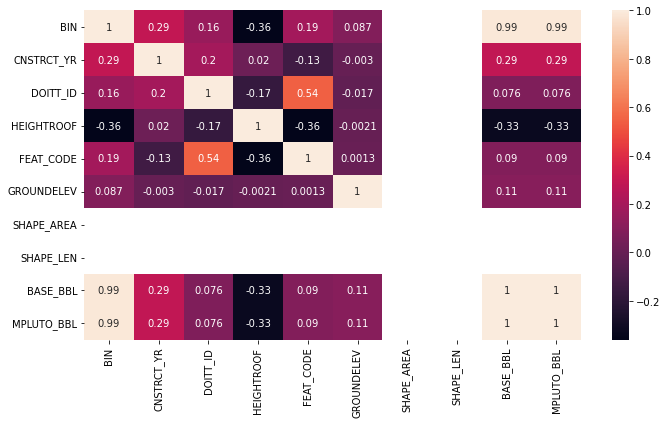

In [25]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(
    building_df.corr(), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

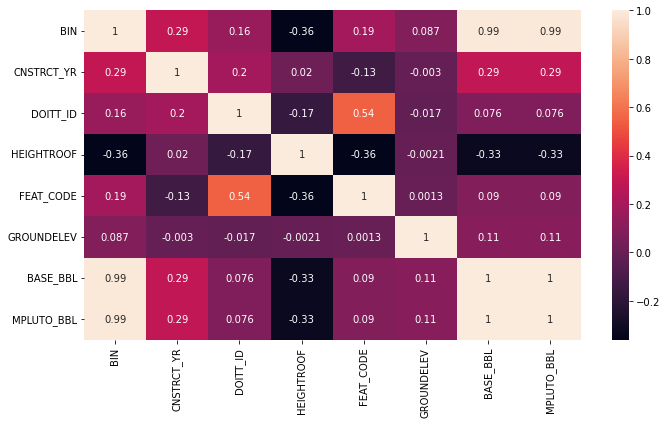

In [26]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10, 6))

# dropping columns of all nulls
corr_df = building_df.drop(columns=['SHAPE_AREA', 'SHAPE_LEN'])

sns.heatmap(
    corr_df.corr(), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

## 3.3 Identifying Null Values

In [27]:
# total nulls in dataframe
null_count = (
    building_df
    .isnull()
    .sum()
    .sum()
)

print('total nulls in dataframe: {:,}'.format(null_count))

total nulls in dataframe: 1,097,009


In [28]:
# nulls per column sorted descending
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

NAME          1082461
CNSTRCT_YR      10768
HEIGHTROOF       2689
GROUNDELEV        543
LSTSTATYPE        282
GEOMSOURCE        261
FEAT_CODE           5
the_geom            0
BIN                 0
LSTMODDATE          0
DOITT_ID            0
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL          0
dtype: int64

In [29]:
# calculating a percentage of the number of nulls to total number of records of each column
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
 / len(building_df) * 100
)

NAME          99.821836
CNSTRCT_YR     0.992998
HEIGHTROOF     0.247973
GROUNDELEV     0.050074
LSTSTATYPE     0.026005
GEOMSOURCE     0.024069
FEAT_CODE      0.000461
the_geom       0.000000
BIN            0.000000
LSTMODDATE     0.000000
DOITT_ID       0.000000
SHAPE_AREA     0.000000
SHAPE_LEN      0.000000
BASE_BBL       0.000000
MPLUTO_BBL     0.000000
dtype: float64

In [30]:
# % null as a dataframe
missing_data = (building_df.isnull().sum() / len(building_df)) * 100

# creating a dataframe
(pd
 .DataFrame(missing_data, columns=['perc_missing'])
 .sort_values(by='perc_missing', ascending=False)
)

,perc_missing
NAME,99.821836
CNSTRCT_YR,0.992998
HEIGHTROOF,0.247973
GROUNDELEV,0.050074
LSTSTATYPE,0.026005
GEOMSOURCE,0.024069
FEAT_CODE,0.000461
the_geom,0.000000
BIN,0.000000
LSTMODDATE,0.000000


In [31]:
# return a boolean same-sized object of nulls
building_df.isnull()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084388,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1084389,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1084390,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1084391,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
# return a boolean if any of the values are null in column
(building_df
 .isnull()
 .any()
)

the_geom      False
NAME           True
BIN           False
CNSTRCT_YR     True
LSTMODDATE    False
LSTSTATYPE     True
DOITT_ID      False
HEIGHTROOF     True
FEAT_CODE      True
GROUNDELEV     True
SHAPE_AREA    False
SHAPE_LEN     False
BASE_BBL      False
MPLUTO_BBL    False
GEOMSOURCE     True
dtype: bool

In [33]:
# return a boolean same-sized object of nulls in NAME column
building_df['NAME'].notnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1084388    False
1084389    False
1084390    False
1084391    False
1084392    False
Name: NAME, Length: 1084393, dtype: bool

In [34]:
# returning rows with non-null values in NAME column
building_df.loc[building_df['NAME'].notnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
2182,MULTIPOLYGON (((-73.98276997569724 40.76714774...,Central Park Place,1076205,1987.0,08/22/2017 12:00:00 AM,Constructed,355975,613.000000,2100.0,76.0,0,0,1010480029,1010487503,Other (Man
3913,MULTIPOLYGON (((-73.95317216502298 40.75924424...,Roosevelt Isld Subway Station,1089270,1975.0,03/25/2008 12:00:00 AM,Constructed,996736,28.470000,2100.0,16.0,0,0,1013730001,1013730001,Photogramm
4713,MULTIPOLYGON (((-73.88526375915657 40.86258229...,Alpha House,2102033,1922.0,08/17/2017 12:00:00 AM,Constructed,194515,22.560000,5110.0,98.0,0,0,2032730001,2032730001,Photogramm
6321,MULTIPOLYGON (((-73.88149603905721 40.84855265...,Pheasant Aviary,2123889,1905.0,07/17/2014 12:00:00 AM,Constructed,925752,22.075648,2100.0,70.0,0,0,2031200020,2031200020,Photogramm
8718,MULTIPOLYGON (((-73.8312596282937 40.871147879...,Asch Loop Town Houses,2128807,1969.0,08/22/2017 12:00:00 AM,Constructed,197782,26.450000,2100.0,18.0,0,0,2051410120,2051410120,Photogramm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083640,MULTIPOLYGON (((-73.8983961190808 40.865540627...,St. James Park-Comfort Station,2118204,1937.0,03/17/2020 12:00:00 AM,Constructed,705388,27.000000,2100.0,117.0,0,0,2031760001,2031760001,Other (Man
1083779,MULTIPOLYGON (((-73.81074993769292 40.65132294...,14,4542288,1994.0,08/10/2017 12:00:00 AM,Constructed,1272834,115.000000,2100.0,11.0,0,0,4142600001,4142600001,Other (Man
1084038,MULTIPOLYGON (((-73.84510599031981 40.88408328...,Edenwald Playground-Comfort Station,2126936,1954.0,04/10/2023 12:00:00 AM,Constructed,1221255,14.000000,2100.0,131.0,0,0,2049050004,2049050004,Other (Man
1084125,MULTIPOLYGON (((-73.90682762555267 40.67541461...,POPE FRANCIS APARTMENTS AT LORETO,3038661,2022.0,04/14/2023 12:00:00 AM,Constructed,1297533,74.000000,2100.0,69.0,0,0,3014360032,3014360032,Other (Man


In [35]:
# returning rows with null values in NAME column
building_df.loc[building_df['NAME'].isnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084388,MULTIPOLYGON (((-74.01049207665406 40.71574221...,NaN,1090140,2022.0,05/05/2023 12:00:00 AM,Initialization,1299604,175.000000,5100.0,17.0,0,0,1001370010,1001370010,Other (Man
1084389,MULTIPOLYGON (((-74.09798009961735 40.57859613...,NaN,5170229,2023.0,05/05/2023 12:00:00 AM,Constructed,1299605,24.000000,2100.0,5.0,0,0,5036790010,5036790010,Photogramm
1084390,MULTIPOLYGON (((-74.09786575532969 40.57853374...,NaN,5170231,2023.0,05/05/2023 12:00:00 AM,Constructed,1299606,24.000000,2100.0,5.0,0,0,5036790107,5036790107,Photogramm
1084391,MULTIPOLYGON (((-74.09788774086378 40.57869974...,NaN,5053312,2023.0,05/05/2023 12:00:00 AM,Constructed,1299607,24.000000,2100.0,5.0,0,0,5036790011,5036790011,Photogramm


# 4. Data Cleaning & Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## Attribute Information for CNSTRCT_YR:
---------------------------------------------
| Attribute | Description | Field Type | Sensitive Field (Y/N) | Notes| 
|------------ | ------------- | -------- | ----------- | ----------|
| CNSTRCT_YR | The year construction of the building was completed. <br>Originally this column was populated using the Department of Finance Real Property Assessment Database (RPAD). Beginning in 2017 this will be the first year the completed structure is visible in available orthoimagery. Records where this is zero or NULL mean that this information was not available. | double | No

## 4.1 Previewing Column Values

In [36]:
# returning a series of the 'CNSTRCT_YR' column
building_df["CNSTRCT_YR"]

0          1925.0
1          1965.0
2          1970.0
3          1928.0
4          1950.0
            ...  
1084388    2022.0
1084389    2023.0
1084390    2023.0
1084391    2023.0
1084392    2023.0
Name: CNSTRCT_YR, Length: 1084393, dtype: float64

In [37]:
# returning a dataframe of the 'CNSTRCT_YR' column double brackets
building_df.loc[:, ["CNSTRCT_YR"]]

,CNSTRCT_YR
0,1925.0
1,1965.0
2,1970.0
3,1928.0
4,1950.0
...,...
1084388,2022.0
1084389,2023.0
1084390,2023.0
1084391,2023.0


In [38]:
# first five rows sorted by the 'CNSTRCT_YR' column in ascending order
building_df.sort_values('CNSTRCT_YR').head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1041549,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.540000,2100.0,14.0,0,0,3079170009,3079170009,Photogramm
469627,MULTIPOLYGON (((-73.82449114078894 40.76279389...,NaN,4610542,1661.0,08/17/2017 12:00:00 AM,Constructed,1190137,14.846959,5110.0,63.0,0,0,4050130006,4050130006,Photogramm
774198,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.120000,2100.0,64.0,0,0,4050130006,4050130006,Photogramm
57530,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.640000,2100.0,38.0,0,0,5078570090,5078570090,Photogramm
568533,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.260000,2100.0,21.0,0,0,5028300049,5028300049,Photogramm


In [39]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
building_df.sort_values('CNSTRCT_YR', ascending=False).head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1084392,MULTIPOLYGON (((-74.09777339648508 40.57863734...,NaN,5170230,2023.0,05/05/2023 12:00:00 AM,Constructed,1299608,24.0,2100.0,5.0,0,0,5036790008,5036790008,Photogramm
1084136,MULTIPOLYGON (((-73.92823775162091 40.83422938...,NaN,2129149,2023.0,04/04/2023 12:00:00 AM,Constructed,1299431,14.0,2100.0,110.0,0,0,2025120023,2025120023,Other (Man
1084227,MULTIPOLYGON (((-73.9076158062397 40.696879563...,NaN,3428863,2023.0,04/24/2023 12:00:00 AM,Marked for Construction,1299536,55.0,5100.0,65.0,0,0,3033930036,3033930036,Other (Man
1084228,MULTIPOLYGON (((-73.89501875593425 40.82542008...,NaN,2130636,2023.0,04/25/2023 12:00:00 AM,Constructed,1299544,52.0,2100.0,42.0,0,0,2027160048,2027160048,Other (Man
1074536,MULTIPOLYGON (((-73.86669932214586 40.81451791...,NaN,2129205,2023.0,01/30/2023 12:00:00 AM,Constructed,1298974,42.0,2100.0,18.0,0,0,2035150020,2035150020,Other (Man


In [40]:
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

building_df['CNSTRCT_YR'].describe()

count    1.073625e+06
mean     1.939445e+03
std      2.926845e+01
min      1.652000e+03
25%      1.920000e+03
50%      1.930000e+03
75%      1.955000e+03
max      2.023000e+03
Name: CNSTRCT_YR, dtype: float64

In [41]:
# detecting any nulls in our 'CNSTRCT_YR' column
(building_df['CNSTRCT_YR']
 .isnull()
 .values
 .any()
)

True

In [42]:
# summing all the null values in our 'CNSTRCT_YR' column
(building_df['CNSTRCT_YR']
 .isnull()
 .sum()
)

10768

In [43]:
# summing all the not null values in our 'CNSTRCT_YR' column
(building_df['CNSTRCT_YR']
 .notnull()
 .sum()
)

1073625

In [44]:
# printing the percent total of all the null values in our 'CNSTRCT_YR' column.
nulls_sum = building_df['CNSTRCT_YR'].isnull().sum() 
nulls_perc = round(nulls_sum / len(building_df) * 100, 2)

print('percent nulls: {}%'.format(nulls_perc))

percent nulls: 0.99%


In [45]:
# printing the percent total of all the not null values in our 'CNSTRCT_YR' column.
nonnulls_sum = building_df['CNSTRCT_YR'].notnull().sum() 
nonnulls_perc = round(nonnulls_sum / len(building_df) * 100, 2)

print('percent not nulls: {}%'.format(nonnulls_perc))

percent not nulls: 99.01%


## 4.2 Exploring Distribution of Values

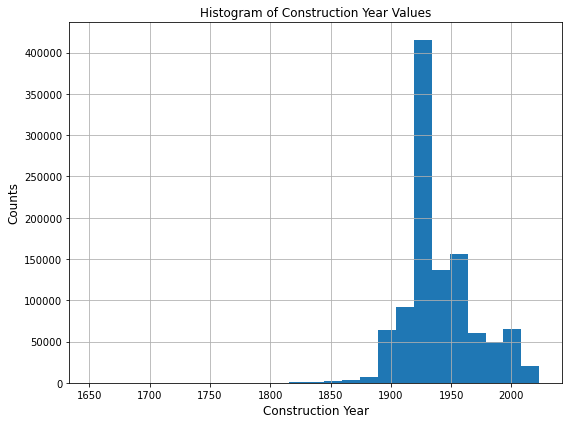

In [46]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
building_df['CNSTRCT_YR'].hist(
    figsize=(8, 6),
    bins=25
)

# adding labels
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12) 
plt.title('Histogram of Construction Year Values', fontsize=12) 

plt.tight_layout()

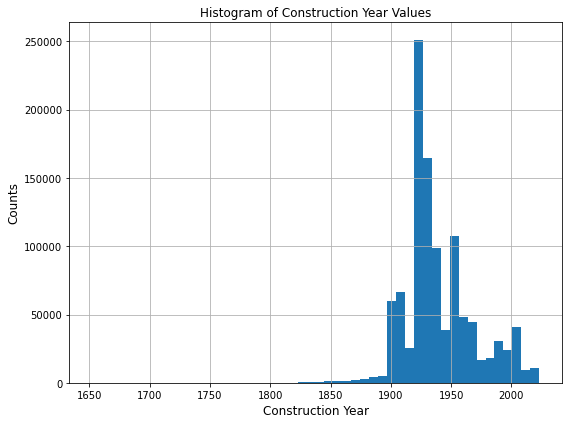

In [47]:
# making a histogram of our 'CNSTRCT_YR' column with 50 bins
building_df['CNSTRCT_YR'].hist(
    figsize=(8, 6),
    bins=50
)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of Construction Year Values', fontsize=12)

plt.tight_layout()

In [48]:
# prints the counts of values in our 'CNSTRCT_YR' column in descending order
building_df['CNSTRCT_YR'].value_counts()

1920.0    130536
1930.0    112809
1925.0    109259
1950.0     62765
1910.0     52432
           ...  
1725.0         1
1797.0         1
1690.0         1
1765.0         1
1792.0         1
Name: CNSTRCT_YR, Length: 250, dtype: int64

In [49]:
# counts of values sorted by the index (in this case, year) ascending order
building_df['CNSTRCT_YR'].value_counts().sort_index()

1652.0       1
1661.0       2
1680.0       1
1690.0       1
1694.0       1
          ... 
2019.0    1156
2020.0    1487
2021.0    1344
2022.0    1051
2023.0     134
Name: CNSTRCT_YR, Length: 250, dtype: int64

In [50]:
# value counts of the first ten rows sorted by the index ascending order
(building_df['CNSTRCT_YR']
 .value_counts()
 .sort_index(ascending=True)
 .head(10)
)

1652.0    1
1661.0    2
1680.0    1
1690.0    1
1694.0    1
1706.0    2
1719.0    1
1720.0    1
1722.0    1
1725.0    1
Name: CNSTRCT_YR, dtype: int64

In [51]:
# value counts of the first ten rows sorted by the index descending order
(building_df['CNSTRCT_YR']
 .value_counts()
 .sort_index(ascending=False)
 .head(10)
)

2023.0     134
2022.0    1051
2021.0    1344
2020.0    1487
2019.0    1156
2018.0    2158
2017.0    1930
2016.0    1815
2015.0    1083
2014.0     856
Name: CNSTRCT_YR, dtype: int64

## 4.3 Making a Box Plot

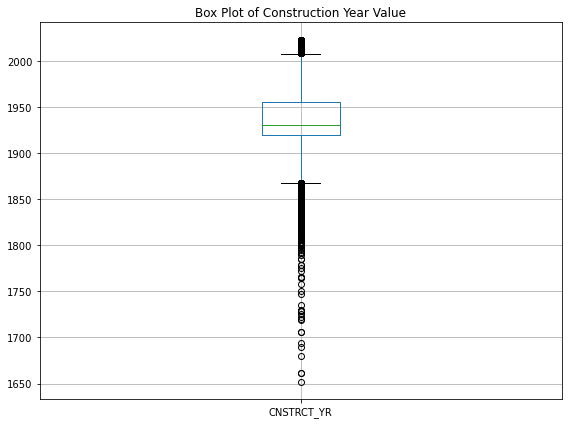

In [52]:
# making a box plot from our 'CNSTRCT_YR' column
building_df.boxplot(
    column=['CNSTRCT_YR'], 
    figsize=(8, 6)
)

plt.title('Box Plot of Construction Year Value', fontsize=12)

plt.tight_layout()

## 4.5 Dropping Null Values for CNSTRCT_YR

In [53]:
# dropping all records where 'CNSTRCT_YR' as nan
building_df_dropna = building_df.dropna(subset=['CNSTRCT_YR'])

# printing number of records
print(len(building_df_dropna))

1073625


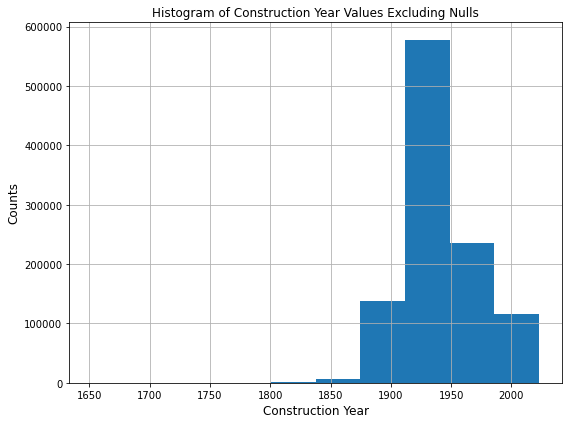

In [54]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_df_dropna['CNSTRCT_YR'].hist(
    bins=10,
    figsize=(8, 6)
)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of Construction Year Values Excluding Nulls', fontsize=12)

plt.tight_layout()

## 4.6 Filling In Null/NA Values With Median for CNSTRCT_YR

In [55]:
# saving a new dataframe to fill nans with the median value of 'CNSTRCT_YR'
building_df_fillna = building_df.copy()

counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()
print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 10,768


In [56]:
median = building_df_fillna['CNSTRCT_YR'].median()

print('median value of CNSTRCT_YR: {}'.format(median))

median value of CNSTRCT_YR: 1930.0


In [57]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_df_fillna['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_df_fillna["CNSTRCT_YR"] = building_df_fillna["CNSTRCT_YR"].fillna(value=median)
building_df_fillna.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm


In [58]:
counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()
print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 0


# 5. Analysis

## 5.1 Timeseries of Year Built

In [59]:
# returning number of buildings by year as 'g'
year_df = (
    building_df_dropna
     .groupby('CNSTRCT_YR')['DOITT_ID']
     .count()
     .reset_index()
     .rename({'DOITT_ID': 'count'}, axis=1)
     .set_index('CNSTRCT_YR', drop=True)
)

year_df

,count
CNSTRCT_YR,
1652.0,1
1661.0,2
1680.0,1
1690.0,1
1694.0,1
...,...
2019.0,1156
2020.0,1487
2021.0,1344


In [60]:
# set index to int
year_df.index = year_df.index.astype('int64')

year_df.head()

,count
CNSTRCT_YR,
1652,1
1661,2
1680,1
1690,1
1694,1


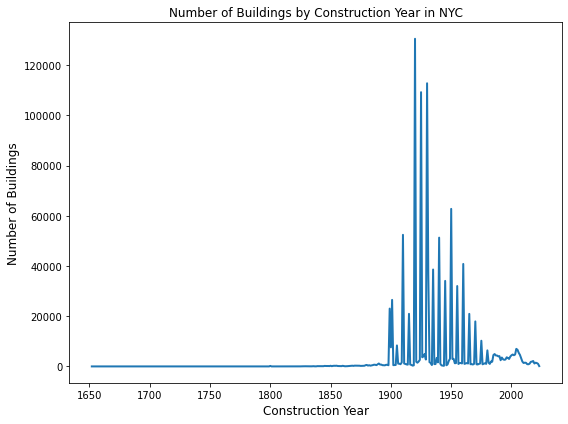

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))

# plotting line chart of number of buildings by 'CNSTRCT_YR'
ax.plot(year_df['count'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

In [62]:
# calculating the cumulative sum of buildings by 'CNSTRCT_YR'
year_df['cumsum'] = year_df['count'].cumsum()

# previewing first five rows
year_df.head()

,count,cumsum
CNSTRCT_YR,,
1652,1,1
1661,2,3
1680,1,4
1690,1,5
1694,1,6


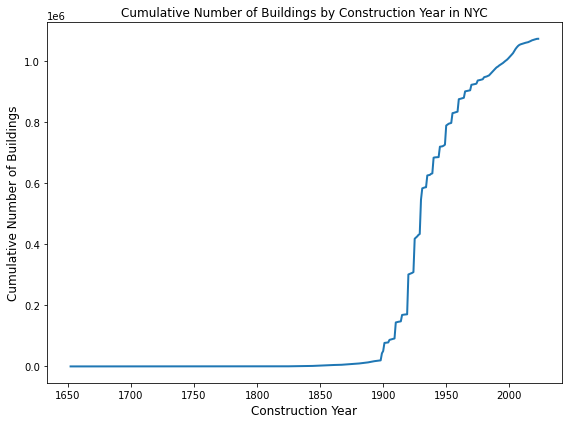

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))

# plotting line chart of cumulative number of buildings by 'CNSTRCT_YR'
ax.plot(year_df['cumsum'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Cumulative Number of Buildings', fontsize=12)
plt.title('Cumulative Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

## 5.2 Attempting to identify the oldest building in the dataset

In [64]:
# sorting by the 'CNSTRCT_YR' in ascending order and 
# dropping records that don't have a building name (i.e. NAME)

(building_df
 .sort_values(by='CNSTRCT_YR')
 .dropna(subset=['NAME'])
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1041549,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100.0,14.0,0,0,3079170009,3079170009,Photogramm
774198,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.12,2100.0,64.0,0,0,4050130006,4050130006,Photogramm
57530,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.64,2100.0,38.0,0,0,5078570090,5078570090,Photogramm
568533,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.26,2100.0,21.0,0,0,5028300049,5028300049,Photogramm
549146,MULTIPOLYGON (((-74.01121069434295 40.70334382...,Fraunces Tavern,1078965,1719.0,01/28/2020 12:00:00 AM,Constructed,299639,47.83,2100.0,7.0,0,0,1000070035,1000070035,Photogramm


In [65]:
# identifying the oldest building with a building name in this dataset and
oldest = (
    building_df
    .sort_values(by='CNSTRCT_YR')
    .dropna(subset=['NAME'])
    .head(1)
)

oldest

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1041549,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100.0,14.0,0,0,3079170009,3079170009,Photogramm


### We will use the Pieter Claesen Wyckoff House as the oldest building in this dataset

**Screenshot of Pieter Claesen Wyckoff House from Wikipedia:**

https://en.wikipedia.org/wiki/Wyckoff_House

![Pieter-Claesen-Wyckoff-House](images/Pieter-Claesen-Wyckoff-House.png)

# 6. Conclusion

In this notebook, we reviewed various ways to inspect, clean, wrangle, and detect outliers in your data.  Specifically, we focused on ways to inspect the shape (number of rows, columns) of your data, fill in or replace incorrect values with the median, and detect outliers with box plots. This step is crucial if you are interested in modeling or predicting future values. In Part III, we will focus on data visualization.